In [6]:
# Read in HPI data from spreadsheet
import pandas as pd
xls = pd.read_excel('../data/halifax/regionalhistoricq32015.xls', sheetname='All (NSA) Quarters')
xls.head(10)

A REGIONAL HOUSE PRICE INDICES Unnamed: 1 Unnamed: 2      Unnamed: 3  \
0                            NaN        NaN        NaN             NaN   
1         ALL HOUSES (ALLBUYERS)        NaN        NaN             NaN   
2                            NaN        NaN        NaN             NaN   
3                            NaN      NORTH        NaN  YORKS. & HUMB.   
4                            NaN      Index          %           Index   
5                       1983  Q1       96.5          .            96.2   
6                       1983  Q2       98.8          .           100.2   
7                       1983  Q3      102.4          .           101.7   
8                       1983  Q4      102.6          .           102.2   
9                       1984  Q1      101.3        4.9           102.9   

  Unnamed: 4  Unnamed: 5 Unnamed: 6   Unnamed: 7 Unnamed: 8   Unnamed: 9  \
0        NaN         NaN        NaN          NaN        NaN          NaN   
1        NaN         NaN        NaN          NaN        NaN          NaN   
2        NaN         NaN        NaN          NaN        NaN          NaN   
3        NaN  NORTH WEST        NaN  E. MIDLANDS        NaN  W. MIDLANDS   
4          %       Index          %        Index          %        Index   
5          .        96.5          .         95.5          .         97.1   
6          .       100.2          .        100.4          .        101.2   
7          .       101.8          .        102.5          .        101.7   
8          .       101.5          .          102          .        100.2   
9          7       100.7        4.4        102.6        7.4        100.5   

      ...     Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21  \
0     ...             NaN         NaN         NaN         NaN         NaN   
1     ...             NaN         NaN         NaN         NaN         NaN   
2     ...             NaN         NaN         NaN         NaN         NaN   
3     ...      GR. LONDON         NaN       WALES         NaN    SCOTLAND   
4     ...           Index           %       Index           %       Index   
5     ...            95.7           .        96.4           .        94.4   
6     ...            99.2           .       100.8           .        98.9   
7     ...           102.6           .       102.2           .       102.9   
8     ...           103.2           .       100.4           .       103.6   
9     ...           105.9        10.6       100.9         4.7       103.8   

  Unnamed: 22 Unnamed: 23 Unnamed: 24       Unnamed: 25 Unnamed: 26  
0         NaN         NaN         NaN               NaN         NaN  
1         NaN         NaN         NaN  INDEX 1983 = 100         NaN  
2         NaN         NaN         NaN               NaN         NaN  
3         NaN  N. IRELAND         NaN                UK         NaN  
4           %       Index           %             Index           %  
5           .        96.3           .              95.9           .  
6           .        99.5           .              99.9           .  
7           .       102.5           .             102.2           .  
8           .       101.4           .             102.4           .  
9          10       103.4         7.3             102.9         7.3  

[10 rows x 27 columns]

In [2]:
# Preprocess data into MultiIndex DataFrame
cols = []
for region in [r[0].title() for r in zip(*[iter(all_prop.columns[1:])] * 2)]:
    cols.append((region, 'Price'))
    cols.append((region, 'Index'))
df = pd.DataFrame(all_prop.iloc[2:, 1:].values, 
                  index=[s[-4:] + s[:2] for s in all_prop['Q1  1993'][2:].values],
                  columns=pd.MultiIndex.from_tuples(cols, names=['Region', 'Metric']))
df.head()

Region    North          Yorks & Hside          North West          East Mids  \
Metric    Price    Index         Price    Index      Price    Index     Price   
1973Q4  7712.95  16.8823       9516.61   19.384    8019.74  15.5201   8637.49   
1974Q1  7742.81  16.9477       9628.72  19.6123    8145.65  15.7638   8845.38   
1974Q2  7732.85  16.9259       9803.11  19.9675    8213.45   15.895   9001.29   
1974Q3  7862.23  17.2091       10077.1  20.5257    8174.71  15.8201   8907.74   
1974Q4   7931.9  17.3616       10102.1  20.5764    8329.68    16.12   8897.35   

Region          West Mids            ...    South West             Wales  \
Metric    Index     Price    Index   ...         Price    Index    Price   
1973Q4    19.05    9388.3  18.0056   ...       9604.51  17.8012  8952.88   
1974Q1  19.5085   9646.88  18.5016   ...       9917.17  18.3807  9254.18   
1974Q2  19.8524   9736.39  18.6732   ...       10073.5  18.6704  9415.59   
1974Q3  19.6461   9835.84   18.864   ...       10356.8  19.1956   9523.2   
1974Q4  19.6231   9835.84   18.864   ...       10591.3  19.6302  9770.69   

Region          Scotland          N Ireland                Uk           
Metric    Index    Price    Index     Price    Index    Price    Index  
1973Q4  18.4893  8971.94  17.0994   7951.96  22.9999  9767.45  19.4849  
1974Q1  19.1115   9082.7  17.3105   8396.61  24.2859  9927.77  19.8047  
1974Q2  19.4449  9173.33  17.4833   8458.65  24.4654  10027.4  20.0034  
1974Q3  19.6671  9525.76   18.155   8706.83  25.1832  10147.9  20.2438  
1974Q4  20.1782  9707.01  18.5004   9099.77  26.3197  10207.6   20.363  

[5 rows x 28 columns]

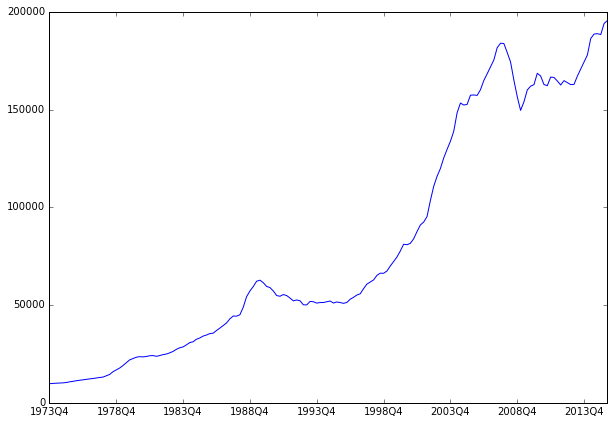

In [16]:
# Plot a region's HPI
%matplotlib inline
ts = df['Uk']['Price']
ax = ts.plot()